In [1]:
print("Hello world!")

Hello world!


 ## Defining a function for automating the process of data download

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH) : 
    os.makedirs(housing_path,exist_ok = True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

## load data function

In [4]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH) :
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()
df = load_housing_data()

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Gives the count of non null values in the df and also the total number of entries

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Tells about the data in categorical columns

In [8]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df_ocean = df.groupby(['ocean_proximity'])
df_ocean_mean = df_ocean.mean()
df_ocean_median = df_ocean.median()

In [10]:
df_ocean_mean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [11]:
df_ocean_median

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.275,34.03,30.0,2108.0,438.0,1247.0,421.0,3.87500,214850.0
INLAND,-120.000,36.97,23.0,2131.0,423.0,1124.0,385.0,2.98770,108500.0
ISLAND,-118.320,33.34,52.0,1675.0,512.0,733.0,288.0,2.73610,414700.0
NEAR BAY,-122.250,37.79,39.0,2083.0,423.0,1033.5,406.0,3.81865,233800.0
NEAR OCEAN,-118.260,33.79,29.0,2195.0,464.0,1136.5,429.0,3.64705,229450.0


## Numercal Attributes of the data

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Histogram distribution of input data points

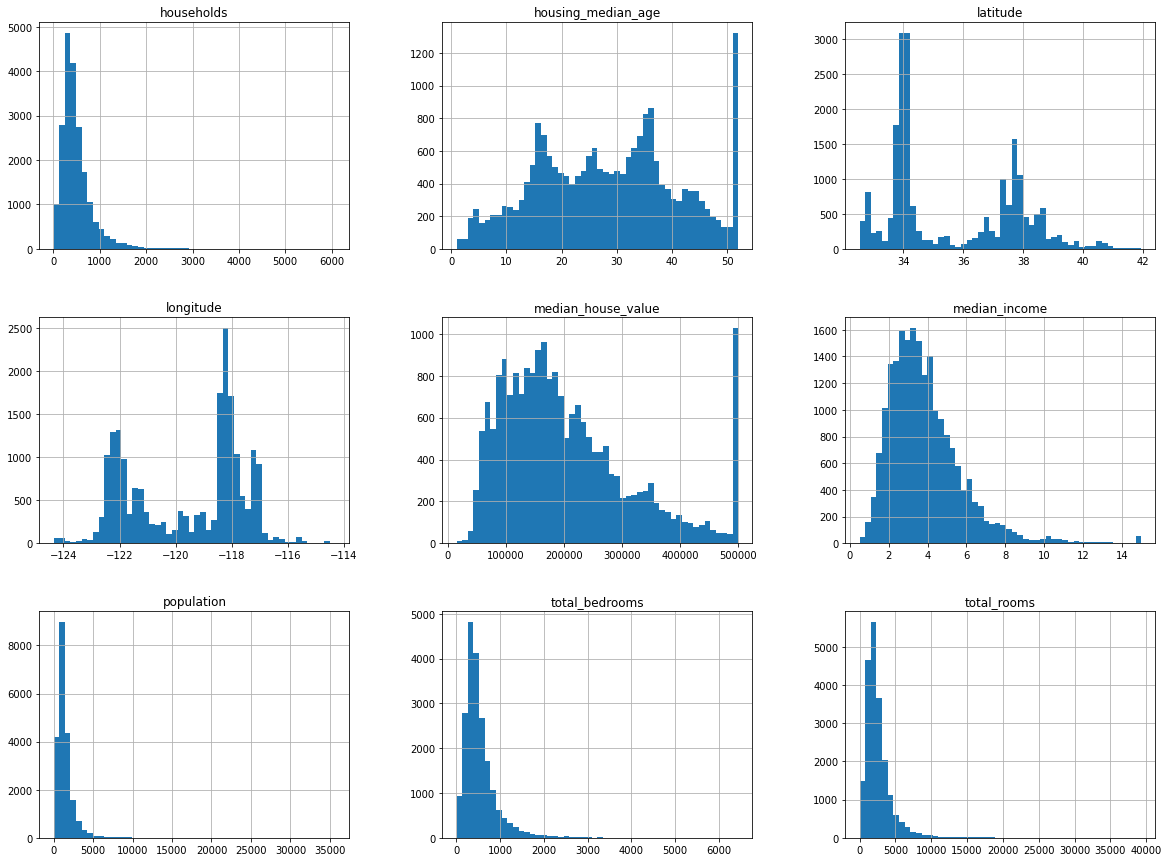

In [13]:
%matplotlib inline 
# graphical backend of jupyter to be used by matplotlib
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show()

## Conclusions
1. Major conclusions - some attributes are tail-heavy : they extebd much farther to the right of the median than to the left. This can make it harder for ML algos to detect patterns. we need to try to transform these attributes to a more bell shaped distribution
2. Some Xs and y as well is capped at higher value - this maybe a problem especially the capped y ( median_house_value)

In [14]:
import numpy as np
def split_train_test(data, test_ratio) : 
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data)) # randomly shuffles the indices of the df
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(df,0.2)
# test_set.info()
print(len(train_set),len(test_set))

16512 4128


## Creating a categorical column from the median income column

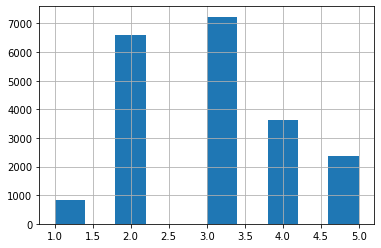

In [16]:
df['income_cat'] = pd.cut(df['median_income'],bins = [0.0,1.5,3.0,4.5,6.0,np.inf],labels = [1,2,3,4,5])
df['income_cat'].hist()

## Stratified Sampling process based on income category split

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    

In [18]:
print(strat_test_set['income_cat'].value_counts()/len(strat_test_set))
print(df['income_cat'].value_counts()/len(df))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


## After Stratified Sampling has been done, remove the created temp categorical variable

In [19]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1, inplace=True)

## Data Exploration and Visualization

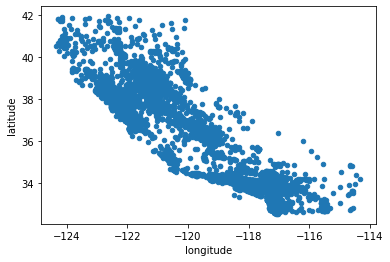

In [20]:
df_exp = strat_train_set.copy()

#exploring the geographical data

df_exp.plot(kind = "scatter", x = 'longitude',y = 'latitude')

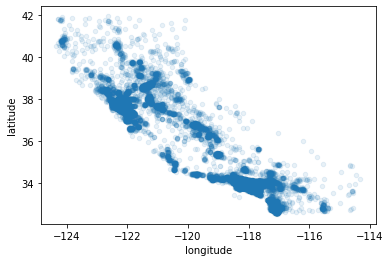

In [21]:
# introducing alpha variable in plot function

df_exp.plot(kind = 'scatter',x = 'longitude',y = 'latitude', alpha = 0.1)

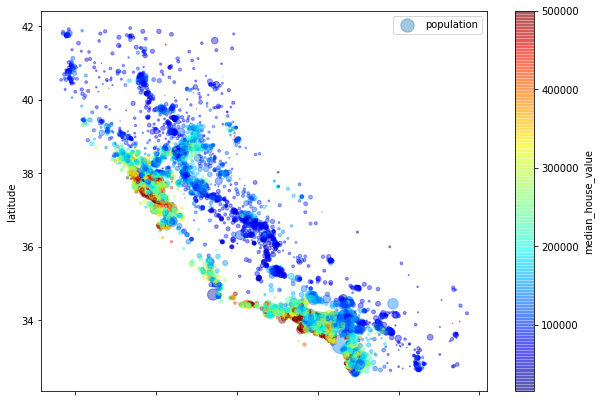

In [22]:
# adding population as circle radius(s) and price as color(c)

df_exp.plot.scatter(x = 'longitude',y = 'latitude', alpha = 0.4, s = (df_exp['population']/100),label = "population" ,figsize=(10,7),c = "median_house_value", cmap = plt.get_cmap("jet"),colorbar = True)
# df_exp.plot.scatter(x = 'longitude',y = 'latitude', alpha = 0.4, figsize=(10,7),c = "median_house_value", cmap = plt.get_cmap("jet"),colorbar = True)
plt.legend()
plt.show()

In [23]:
corr_matrix = df_exp.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [24]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b91b550>,
      dtype=object)

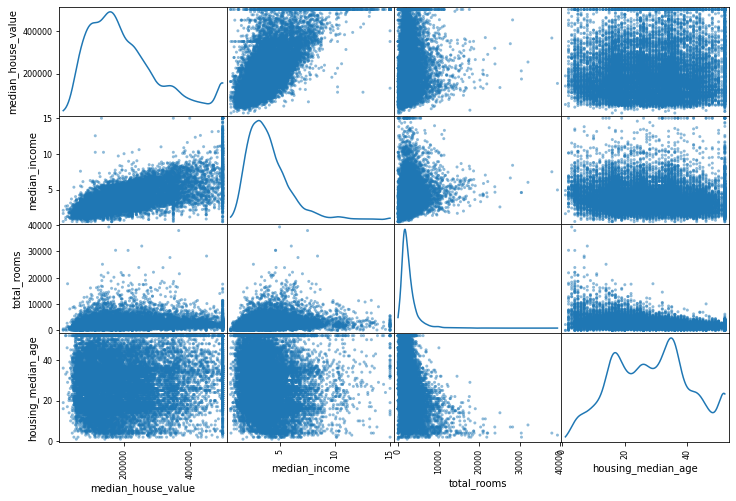

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df_exp[attributes],figsize=(12,8),diagonal = 'kde')

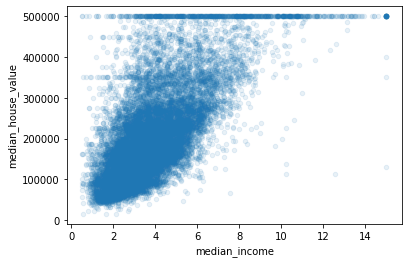

In [26]:
# df_exp.plot(kind = 'scatter', x= 'median_income', y = 'median_house_value',alpha = 0.1,s = df_exp['housing_median_age'],c = 'total_rooms',cmap = plt.get_cmap('jet'))
df_exp.plot(kind = 'scatter', x= 'median_income', y = 'median_house_value',alpha = 0.1)

## Create New Features based on domain understanding

In [27]:
df_exp['rooms_per_household'] = df_exp['total_rooms']/df_exp['households']
df_exp['bedrooms_per_room'] = df_exp['total_bedrooms']/df_exp['total_rooms']

df_exp['poulation_per_house'] = df_exp['population']/df_exp['households']

corr_matrix = df_exp.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,poulation_per_house
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [28]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.687160
rooms_per_household    0.146285
total_rooms            0.135097
housing_median_age     0.114110
households             0.064506
total_bedrooms         0.047689
poulation_per_house   -0.021985
population            -0.026920
longitude             -0.047432
latitude              -0.142724
bedrooms_per_room     -0.259984
Name: median_house_value, dtype: float64

## Preparing the data for Machine learning algorithms,
Start from a clean slate with the strat_train_set
try creating as much functions as possible - in the long run it would help in creating a transformation library to pick up directly for other projects

In [29]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

housing_num = housing.drop('ocean_proximity', axis = 1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
X = imputer.transform(housing_num)

housing_cat = housing[['ocean_proximity']].copy()

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [34]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Creating a class for combined attributes , aim - to automate all the parameters and explore all combinations

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin) : 
    def __init__(self, add_bedrooms_per_room = True) :  
    #no *args or **kargs    
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X,y=None):
        return self #Nothing else is required to be done
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)


In [41]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = True)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 4.625368731563422, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, ..., 6.008849557522124, 2.7079646017699117,
        0.15905743740795286],
       [-117.2, 32.77, 31.0, ..., 4.225108225108225, 2.0259740259740258,
        0.24129098360655737],
       ...,
       [-116.4, 34.09, 9.0, ..., 6.34640522875817, 2.742483660130719,
        0.1796086508753862],
       [-118.01, 33.82, 31.0, ..., 5.50561797752809, 3.808988764044944,
        0.19387755102040816],
       [-122.45, 37.77, 52.0, ..., 4.843505477308295, 1.9859154929577465,
        0.22035541195476574]], dtype=object)

## Transformer Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')),('attribs_adder',CombinedAttributesAdder()),('std_scaler',StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

## The Names of the steps in the pipeline will be useful for hyperparameter tuning later

In [46]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

## Combining the Numercal and Column Transformations together

In [48]:
#using ColumnTranformer
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']
print(num_attribs)

full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',OneHotEncoder(),cat_attribs)],remainder = 'passthrough')

housing_prepared = full_pipeline.fit_transform(housing)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [51]:
## trying it out

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:",lin_reg.predict(some_data_prepared))
print("Actuals:",some_labels.values)

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Actuals: [286600. 340600. 196900.  46300. 254500.]


In [52]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848923


In [53]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Using K-fold Cross validation

In [56]:
from sklearn.model_selection import cross_val_score

def cross_validate_score(reg,cv_c):
    return cross_val_score(reg,housing_prepared,housing_labels,scoring = "neg_mean_squared_error", cv = cv_c)
    
scores = cross_validate_score(tree_reg,10)
# the scoring function in cross validation for scikit is a utility function (not a cost sunction) --> more is better
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())
    
display_scores(tree_rmse_scores)

Scores :  [67669.73816437 67362.61970456 70229.34328631 68299.62160307
 71291.36213287 75577.59634532 72668.53981039 70226.23940832
 77010.86953522 69438.29976359]
Mean :  70977.42297540254
Standard Deviation :  3085.3445235048844


In [57]:
lin_scores = cross_validate_score(lin_reg,10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean :  69052.46136345083
Standard Deviation :  2731.674001798344


In [70]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared,housing_labels)

forest_scores = cross_validate_score(forest_reg,10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores :  [49431.1675035  47725.76503972 49990.2098557  52275.72495815
 50074.45511696 53636.71509364 48748.69736695 47903.98597645
 52529.25175252 50287.99991607]
Mean :  50260.397257966746
Standard Deviation :  1888.5708712841697


In [59]:
 housing_predictions = forest_reg.predict(housing_prepared)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [60]:
print(rmse)

18647.2140339276


## Very large difference in scores of training and validations sets --> there is presence of overfitting

## For later reference in the below code we can save the models - can also be done for hyperparamters and parameters - 

In [61]:
! pip3 install joblib

In [62]:
import joblib
joblib.dump(forest_reg,"forest_reg.pkl")

forest_reg = 1
print(forest_reg)

1


In [63]:
forest_reg = joblib.load("forest_reg.pkl")
print(forest_reg)

RandomForestRegressor()


## Model Selection followed by Fine-tuning

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [3,10,30],'max_features' : [2,4,6,8]},{'bootstrap' : [False],'n_estimators' : [3,10],'max_features' : [2,3,4]}]

grid_search = GridSearchCV(forest_reg ,param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [73]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [74]:
grid_search.cv_results_

{'mean_fit_time': array([0.06871858, 0.20823545, 0.63843226, 0.10264196, 0.34549727,
        1.02407861, 0.14847779, 0.51090112, 1.40961442, 0.17924047,
        0.59742069, 1.78414178, 0.09757762, 0.32419038, 0.1295208 ,
        0.42949705, 0.16854281, 0.53437428]),
 'std_fit_time': array([0.00594646, 0.00134616, 0.00460885, 0.00258735, 0.00528698,
        0.03102118, 0.01100709, 0.05089492, 0.04570003, 0.00119139,
        0.00968129, 0.03173777, 0.00163173, 0.00374073, 0.00197742,
        0.00336369, 0.00662809, 0.00300682]),
 'mean_score_time': array([0.00400538, 0.00959654, 0.02677622, 0.00389194, 0.00999074,
        0.02835922, 0.00385265, 0.01136231, 0.02710533, 0.00365686,
        0.00970011, 0.02758512, 0.00405555, 0.01093941, 0.00402927,
        0.01102114, 0.00448236, 0.01120534]),
 'std_score_time': array([3.94822705e-04, 3.12771737e-05, 2.19034753e-04, 6.12469330e-04,
        6.09616276e-04, 3.07622947e-03, 3.48517777e-04, 1.39336366e-03,
        2.22147220e-04, 1.37172965e-

In [75]:
grid_search.best_score_

-2462290297.0890975

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']) : 
    print(np.sqrt(-mean_score),params)

63563.12565552601 {'max_features': 2, 'n_estimators': 3}
55541.51477284215 {'max_features': 2, 'n_estimators': 10}
52930.339113827285 {'max_features': 2, 'n_estimators': 30}
60127.21229861141 {'max_features': 4, 'n_estimators': 3}
53291.78165387729 {'max_features': 4, 'n_estimators': 10}
50342.20193927786 {'max_features': 4, 'n_estimators': 30}
60019.58364663093 {'max_features': 6, 'n_estimators': 3}
52254.442615173604 {'max_features': 6, 'n_estimators': 10}
49621.47012220716 {'max_features': 6, 'n_estimators': 30}
59738.950495317105 {'max_features': 8, 'n_estimators': 3}
52396.8098236931 {'max_features': 8, 'n_estimators': 10}
50167.313663506764 {'max_features': 8, 'n_estimators': 30}
62373.81819433687 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54263.506350284435 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60181.32467012378 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52808.65417726523 {'bootstrap': False, 'max_features': 3, 'n_estimators'

## Analyzing the best model and it's preformance

In [77]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.00721173e-02, 6.89856832e-02, 4.24966703e-02, 1.71531810e-02,
       1.63822741e-02, 1.65469310e-02, 1.61728714e-02, 3.12653960e-01,
       7.21858380e-02, 1.15722202e-01, 8.19828234e-02, 5.51613065e-03,
       1.57622270e-01, 5.73147912e-05, 2.45752167e-03, 3.99221128e-03])

In [78]:
extra_attribs = ['rooms_per_hhold','pop_perhhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']

In [79]:
cat_encoder

OneHotEncoder()

In [80]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [83]:
attributes = num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3126539603081626, 'median_income'),
 (0.1576222699469903, 'INLAND'),
 (0.11572220155415446, 'pop_perhhold'),
 (0.08198282343397573, 'bedrooms_per_room'),
 (0.07218583801301824, 'rooms_per_hhold'),
 (0.07007211734247751, 'longitude'),
 (0.06898568319646814, 'latitude'),
 (0.04249667030712824, 'housing_median_age'),
 (0.017153181002847483, 'total_rooms'),
 (0.016546930997915987, 'population'),
 (0.01638227406596701, 'total_bedrooms'),
 (0.01617287143538311, 'households'),
 (0.005516130649962371, '<1H OCEAN'),
 (0.003992211284825904, 'NEAR OCEAN'),
 (0.0024575216695716714, 'NEAR BAY'),
 (5.7314791151300235e-05, 'ISLAND')]

## Final Evaluation being done on the stratified test set

In [84]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis = 1)
y_test = strat_test_set['median_house_value'].copy()
# y_test.head()

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
Name: median_house_value, dtype: float64

In [86]:
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

48684.10177422836


### Confidence interval for generalization error for test set

In [87]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions-y_test)**2

np.sqrt(stats.t.interval(confidence,len(squared_errors) - 1, loc = squared_errors.mean(),scale = stats.sem(squared_errors)))

array([46618.34321813, 50665.70444318])